In [24]:
# Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor


import warnings
warnings.simplefilter('ignore')

In [25]:
#Import Dataset
data_frame =  pd.read_csv('../data/regression2.csv',header=None)

print(data_frame.head())

print(data_frame.describe())

        0        1       2
0  1.3344  4.31810  26.554
1 -4.7741  0.40734 -91.444
2  1.2416  4.52560  42.384
3 -2.9981 -2.82540 -16.985
4 -1.0294  1.45030 -14.789
                0           1           2
count  400.000000  400.000000  400.000000
mean    -0.052802    0.180348  -11.973339
std      2.948321    2.872836   36.807498
min     -4.935000   -4.966900 -108.560000
25%     -2.947425   -2.268500  -37.873500
50%     -0.020687    0.272550  -10.160500
75%      2.455150    2.620250   13.917750
max      4.977200    4.990100   86.773000


In [26]:
X = data_frame.iloc[:,0:2] #No need to reshape: already have more than one value per row
y = data_frame.iloc[:,2]

print(X)
print(y)

          0        1
0    1.3344  4.31810
1   -4.7741  0.40734
2    1.2416  4.52560
3   -2.9981 -2.82540
4   -1.0294  1.45030
..      ...      ...
395  1.8606 -0.58383
396  1.3990  1.92480
397 -3.4241 -2.64140
398 -2.1031  2.70610
399 -3.0148 -3.40000

[400 rows x 2 columns]
0      26.554
1     -91.444
2      42.384
3     -16.985
4     -14.789
        ...  
395   -29.685
396    -1.067
397   -23.268
398    11.607
399   -16.272
Name: 2, Length: 400, dtype: float64


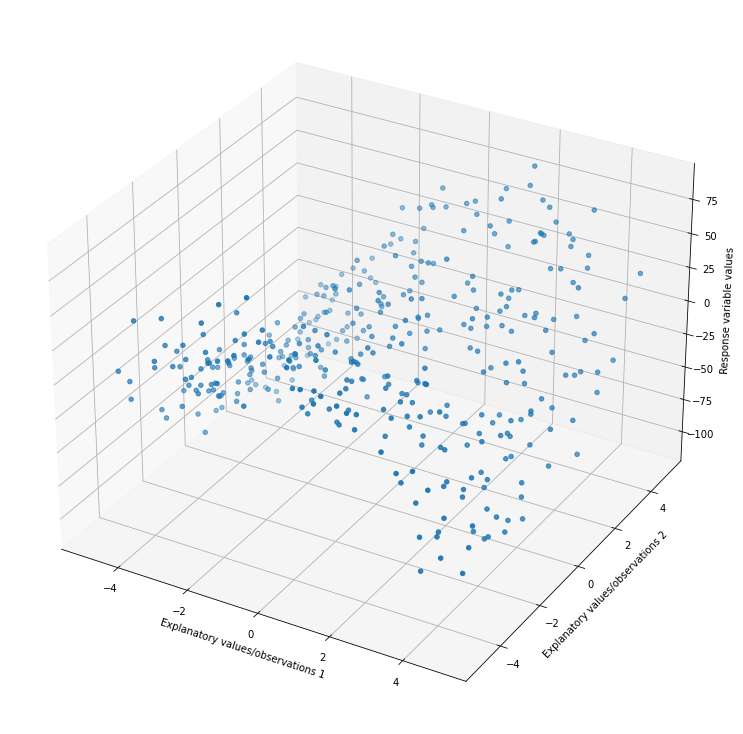

In [27]:


fig = plt.figure(figsize=(14,10))
ax = Axes3D(fig)
ax.scatter(X.iloc[:,0],X.iloc[:,1],y)

ax.set_xlabel('Explanatory values/observations 1')
ax.set_ylabel('Explanatory values/observations 2')
ax.set_zlabel('Response variable values')
plt.show()
#Visualization Shows data is not linear

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

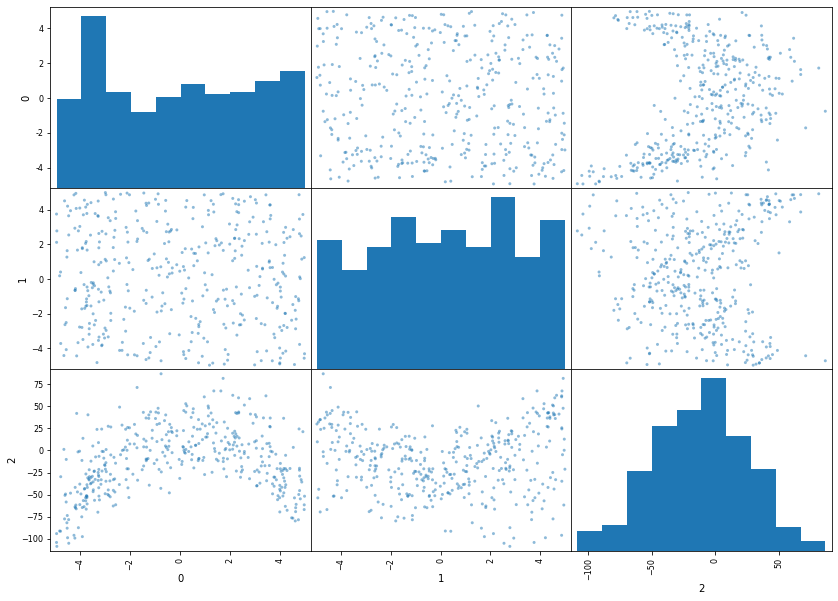

In [28]:
#3D plots can be difficult to interpret. We can complement them with a scatter matrix (often used at an
#earlier stage in the process).
pd.plotting.scatter_matrix(data_frame,  figsize=(14,10))

In [78]:
#MLP with a single hidden layer
mlp = MLPRegressor(hidden_layer_sizes=(150,))

mlp.fit(X,y)

y_pred = mlp.predict(X)


r2 = r2_score(y, y_pred)

print("Coefficient of Determination R^2: %.2f" %  r2)
print("MSE ", round(mean_squared_error(y, y_pred), 4))
print("MAE ", round(mean_absolute_error(y, y_pred), 4))
print("Accuracy ", round(model.score(X, y), 4))

Coefficient of Determination R^2: 0.70
MSE  404.7699
MAE  16.2331
Accuracy  0.7864


In [74]:
model_results = []
for number_of_hidden_nodes in range(100,700):
    mlp = MLPRegressor(hidden_layer_sizes=(number_of_hidden_nodes))
    model = mlp.fit(X, y)
    y_pred = model.predict(X)

    
    mse = round(mean_squared_error(y, y_pred), 4)
    mae = round(mean_absolute_error(y, y_pred), 4)
    score =  round(model.score(X, y),4)
    curr = {
        "NumberOfHiddenNodes":  number_of_hidden_nodes,
        "MSE": mse,
        "MAE": mae,
        "Score" : score,
    
    }
    print(curr)
    model_results.append(curr)

{'NumberOfHiddenNodes': 100, 'MSE': 547.8663, 'MAE': 18.8771, 'Score': 0.5946}
{'NumberOfHiddenNodes': 101, 'MSE': 517.2939, 'MAE': 18.3054, 'Score': 0.6172}
{'NumberOfHiddenNodes': 102, 'MSE': 513.5784, 'MAE': 18.2643, 'Score': 0.62}
{'NumberOfHiddenNodes': 103, 'MSE': 506.8543, 'MAE': 18.1462, 'Score': 0.6249}
{'NumberOfHiddenNodes': 104, 'MSE': 536.5262, 'MAE': 18.6343, 'Score': 0.603}
{'NumberOfHiddenNodes': 105, 'MSE': 505.1858, 'MAE': 18.0893, 'Score': 0.6262}
{'NumberOfHiddenNodes': 106, 'MSE': 525.4509, 'MAE': 18.4456, 'Score': 0.6112}
{'NumberOfHiddenNodes': 107, 'MSE': 498.9684, 'MAE': 18.0258, 'Score': 0.6308}
{'NumberOfHiddenNodes': 108, 'MSE': 505.4464, 'MAE': 18.0936, 'Score': 0.626}
{'NumberOfHiddenNodes': 109, 'MSE': 507.0025, 'MAE': 18.1321, 'Score': 0.6248}
{'NumberOfHiddenNodes': 110, 'MSE': 513.5861, 'MAE': 18.2825, 'Score': 0.62}
{'NumberOfHiddenNodes': 111, 'MSE': 485.4308, 'MAE': 17.7373, 'Score': 0.6408}
{'NumberOfHiddenNodes': 112, 'MSE': 491.5112, 'MAE': 17.85

{'NumberOfHiddenNodes': 205, 'MSE': 343.872, 'MAE': 14.9875, 'Score': 0.7455}
{'NumberOfHiddenNodes': 206, 'MSE': 347.8356, 'MAE': 15.1249, 'Score': 0.7426}
{'NumberOfHiddenNodes': 207, 'MSE': 342.3514, 'MAE': 14.9872, 'Score': 0.7467}
{'NumberOfHiddenNodes': 208, 'MSE': 346.7034, 'MAE': 15.0457, 'Score': 0.7434}
{'NumberOfHiddenNodes': 209, 'MSE': 338.2775, 'MAE': 14.8352, 'Score': 0.7497}
{'NumberOfHiddenNodes': 210, 'MSE': 341.921, 'MAE': 14.9333, 'Score': 0.747}
{'NumberOfHiddenNodes': 211, 'MSE': 340.6489, 'MAE': 14.9009, 'Score': 0.7479}
{'NumberOfHiddenNodes': 212, 'MSE': 340.2095, 'MAE': 14.8935, 'Score': 0.7483}
{'NumberOfHiddenNodes': 213, 'MSE': 339.9638, 'MAE': 14.8552, 'Score': 0.7484}
{'NumberOfHiddenNodes': 214, 'MSE': 340.0124, 'MAE': 14.8924, 'Score': 0.7484}
{'NumberOfHiddenNodes': 215, 'MSE': 338.5611, 'MAE': 14.8453, 'Score': 0.7495}
{'NumberOfHiddenNodes': 216, 'MSE': 343.0316, 'MAE': 14.9652, 'Score': 0.7462}
{'NumberOfHiddenNodes': 217, 'MSE': 340.7998, 'MAE': 14

{'NumberOfHiddenNodes': 310, 'MSE': 303.7134, 'MAE': 14.1068, 'Score': 0.7753}
{'NumberOfHiddenNodes': 311, 'MSE': 304.9293, 'MAE': 14.1098, 'Score': 0.7744}
{'NumberOfHiddenNodes': 312, 'MSE': 305.1097, 'MAE': 14.1346, 'Score': 0.7742}
{'NumberOfHiddenNodes': 313, 'MSE': 304.3505, 'MAE': 14.0905, 'Score': 0.7748}
{'NumberOfHiddenNodes': 314, 'MSE': 304.0968, 'MAE': 14.0732, 'Score': 0.775}
{'NumberOfHiddenNodes': 315, 'MSE': 302.1038, 'MAE': 14.0608, 'Score': 0.7765}
{'NumberOfHiddenNodes': 316, 'MSE': 304.0122, 'MAE': 14.0727, 'Score': 0.775}
{'NumberOfHiddenNodes': 317, 'MSE': 303.1689, 'MAE': 14.0991, 'Score': 0.7757}
{'NumberOfHiddenNodes': 318, 'MSE': 304.274, 'MAE': 14.1287, 'Score': 0.7748}
{'NumberOfHiddenNodes': 319, 'MSE': 303.0018, 'MAE': 14.0785, 'Score': 0.7758}
{'NumberOfHiddenNodes': 320, 'MSE': 304.3322, 'MAE': 14.0515, 'Score': 0.7748}
{'NumberOfHiddenNodes': 321, 'MSE': 304.1055, 'MAE': 14.0914, 'Score': 0.775}
{'NumberOfHiddenNodes': 322, 'MSE': 301.907, 'MAE': 14.0

{'NumberOfHiddenNodes': 415, 'MSE': 296.3268, 'MAE': 13.8921, 'Score': 0.7807}
{'NumberOfHiddenNodes': 416, 'MSE': 297.1157, 'MAE': 13.8741, 'Score': 0.7801}
{'NumberOfHiddenNodes': 417, 'MSE': 295.5237, 'MAE': 13.8944, 'Score': 0.7813}
{'NumberOfHiddenNodes': 418, 'MSE': 295.8808, 'MAE': 13.9042, 'Score': 0.7811}
{'NumberOfHiddenNodes': 419, 'MSE': 295.0093, 'MAE': 13.8672, 'Score': 0.7817}
{'NumberOfHiddenNodes': 420, 'MSE': 296.24, 'MAE': 13.8577, 'Score': 0.7808}
{'NumberOfHiddenNodes': 421, 'MSE': 295.6462, 'MAE': 13.8432, 'Score': 0.7812}
{'NumberOfHiddenNodes': 422, 'MSE': 295.9631, 'MAE': 13.8477, 'Score': 0.781}
{'NumberOfHiddenNodes': 423, 'MSE': 294.6368, 'MAE': 13.8638, 'Score': 0.782}
{'NumberOfHiddenNodes': 424, 'MSE': 295.9369, 'MAE': 13.8822, 'Score': 0.781}
{'NumberOfHiddenNodes': 425, 'MSE': 296.3706, 'MAE': 13.8667, 'Score': 0.7807}
{'NumberOfHiddenNodes': 426, 'MSE': 295.7476, 'MAE': 13.8765, 'Score': 0.7812}
{'NumberOfHiddenNodes': 427, 'MSE': 295.0525, 'MAE': 13.8

{'NumberOfHiddenNodes': 520, 'MSE': 292.8665, 'MAE': 13.776, 'Score': 0.7833}
{'NumberOfHiddenNodes': 521, 'MSE': 291.7881, 'MAE': 13.7781, 'Score': 0.7841}
{'NumberOfHiddenNodes': 522, 'MSE': 294.2849, 'MAE': 13.7869, 'Score': 0.7822}
{'NumberOfHiddenNodes': 523, 'MSE': 291.6717, 'MAE': 13.7637, 'Score': 0.7842}
{'NumberOfHiddenNodes': 524, 'MSE': 293.7579, 'MAE': 13.7624, 'Score': 0.7826}
{'NumberOfHiddenNodes': 525, 'MSE': 292.477, 'MAE': 13.7543, 'Score': 0.7836}
{'NumberOfHiddenNodes': 526, 'MSE': 294.5931, 'MAE': 13.7852, 'Score': 0.782}
{'NumberOfHiddenNodes': 527, 'MSE': 292.944, 'MAE': 13.7445, 'Score': 0.7832}
{'NumberOfHiddenNodes': 528, 'MSE': 292.2629, 'MAE': 13.7613, 'Score': 0.7837}
{'NumberOfHiddenNodes': 529, 'MSE': 292.3035, 'MAE': 13.758, 'Score': 0.7837}
{'NumberOfHiddenNodes': 530, 'MSE': 291.6183, 'MAE': 13.7668, 'Score': 0.7842}
{'NumberOfHiddenNodes': 531, 'MSE': 291.9923, 'MAE': 13.7792, 'Score': 0.7839}
{'NumberOfHiddenNodes': 532, 'MSE': 291.9336, 'MAE': 13.7

{'NumberOfHiddenNodes': 625, 'MSE': 290.0956, 'MAE': 13.7343, 'Score': 0.7853}
{'NumberOfHiddenNodes': 626, 'MSE': 291.0845, 'MAE': 13.7074, 'Score': 0.7846}
{'NumberOfHiddenNodes': 627, 'MSE': 291.0412, 'MAE': 13.678, 'Score': 0.7846}
{'NumberOfHiddenNodes': 628, 'MSE': 290.3776, 'MAE': 13.6986, 'Score': 0.7851}
{'NumberOfHiddenNodes': 629, 'MSE': 290.8391, 'MAE': 13.6899, 'Score': 0.7848}
{'NumberOfHiddenNodes': 630, 'MSE': 291.2655, 'MAE': 13.6938, 'Score': 0.7845}
{'NumberOfHiddenNodes': 631, 'MSE': 290.6008, 'MAE': 13.6892, 'Score': 0.785}
{'NumberOfHiddenNodes': 632, 'MSE': 290.1754, 'MAE': 13.6954, 'Score': 0.7853}
{'NumberOfHiddenNodes': 633, 'MSE': 290.5192, 'MAE': 13.6845, 'Score': 0.785}
{'NumberOfHiddenNodes': 634, 'MSE': 290.023, 'MAE': 13.6938, 'Score': 0.7854}
{'NumberOfHiddenNodes': 635, 'MSE': 289.4649, 'MAE': 13.6926, 'Score': 0.7858}
{'NumberOfHiddenNodes': 636, 'MSE': 290.1323, 'MAE': 13.7092, 'Score': 0.7853}
{'NumberOfHiddenNodes': 637, 'MSE': 290.7228, 'MAE': 13.

Text(0, 0.5, 'MSE')

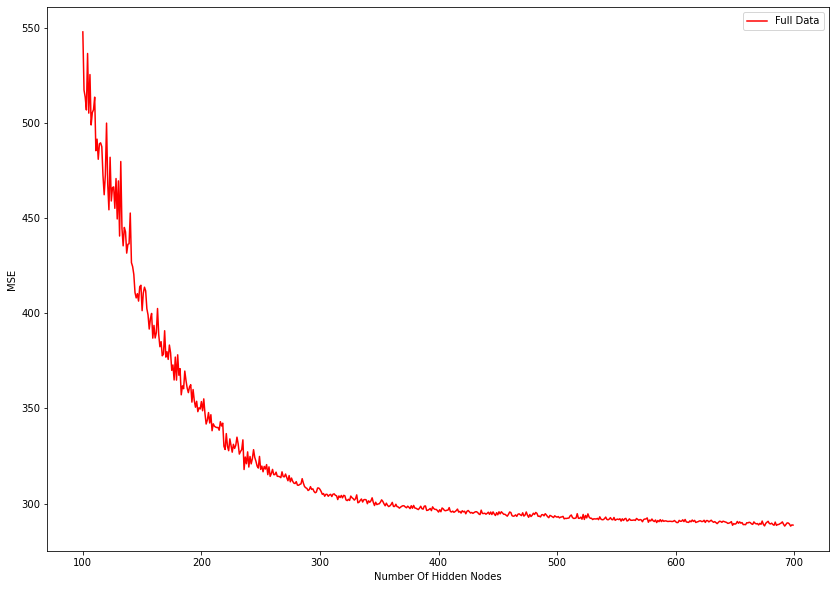

In [75]:
model_results = pd.DataFrame (model_results,columns = ['NumberOfHiddenNodes','MSE','MAE'])
hidden_nodes = model_results["NumberOfHiddenNodes"]
mse = model_results["MSE"]




plt.figure(figsize=(14,10))
plt.plot(hidden_nodes, mse, color='red', label="Full Data")
plt.legend()
plt.xlabel("Number Of Hidden Nodes")
plt.ylabel("MSE")

In [69]:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

test_train_model_results = []

for number_of_hidden_nodes in range(100,700):
    mlp = MLPRegressor(hidden_layer_sizes=(number_of_hidden_nodes))
    model = mlp.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = round(mean_squared_error(y_train, train_pred), 4)
    test_mse = round(mean_squared_error(y_test, test_pred), 4)
    train_mae = round(mean_absolute_error(y_train, train_pred), 4)
    test_mae = round(mean_absolute_error(y_test, test_pred), 4)
    test_score =  model.score(X_test, y_test)
    train_score = model.score(X_train, y_train)
    curr = {
        "NumberOfHiddenNodes":  number_of_hidden_nodes,
        "TrainMSE": train_mse,
        "TestMSE": test_mse ,
        "TrainMAE": train_mae,
        "TestMAE": test_mae,
        "TestScore" : test_score,
        "TrainScore": train_score
    }
    print(curr)
    test_train_model_results.append(curr)
    


{'NumberOfHiddenNodes': 100, 'TrainMSE': 606.2682, 'TestMSE': 684.4427, 'TrainMAE': 19.7906, 'TestMAE': 20.9802, 'TestScore': 0.47941798980353967, 'TrainScore': 0.5537321277629303}
{'NumberOfHiddenNodes': 101, 'TrainMSE': 577.5317, 'TestMSE': 653.5577, 'TrainMAE': 19.3387, 'TestMAE': 20.4738, 'TestScore': 0.502908899200073, 'TrainScore': 0.5748847837917763}
{'NumberOfHiddenNodes': 102, 'TrainMSE': 560.0096, 'TestMSE': 640.0856, 'TrainMAE': 19.0339, 'TestMAE': 20.2917, 'TestScore': 0.5131556708868402, 'TrainScore': 0.5877826151263852}
{'NumberOfHiddenNodes': 103, 'TrainMSE': 540.1545, 'TestMSE': 616.0446, 'TrainMAE': 18.748, 'TestMAE': 19.954, 'TestScore': 0.5314410283066853, 'TrainScore': 0.6023977524440839}
{'NumberOfHiddenNodes': 104, 'TrainMSE': 569.2299, 'TestMSE': 638.9782, 'TrainMAE': 19.2028, 'TestMAE': 20.2774, 'TestScore': 0.5139979053805075, 'TrainScore': 0.5809956156701948}
{'NumberOfHiddenNodes': 105, 'TrainMSE': 537.5119, 'TestMSE': 597.7069, 'TrainMAE': 18.6388, 'TestMAE'

{'NumberOfHiddenNodes': 146, 'TrainMSE': 469.1257, 'TestMSE': 525.0198, 'TrainMAE': 17.4639, 'TestMAE': 18.4167, 'TestScore': 0.6006738627133418, 'TrainScore': 0.6546813300204131}
{'NumberOfHiddenNodes': 147, 'TrainMSE': 459.9812, 'TestMSE': 509.0198, 'TrainMAE': 17.3357, 'TestMAE': 18.2391, 'TestScore': 0.6128433414056357, 'TrainScore': 0.6614124715369533}
{'NumberOfHiddenNodes': 148, 'TrainMSE': 450.9605, 'TestMSE': 503.8926, 'TrainMAE': 17.1483, 'TestMAE': 18.0743, 'TestScore': 0.6167430193344594, 'TrainScore': 0.6680525133342907}
{'NumberOfHiddenNodes': 149, 'TrainMSE': 462.9637, 'TestMSE': 522.6093, 'TrainMAE': 17.3496, 'TestMAE': 18.3655, 'TestScore': 0.6025072371709026, 'TrainScore': 0.6592170955002148}
{'NumberOfHiddenNodes': 150, 'TrainMSE': 442.1186, 'TestMSE': 489.2034, 'TrainMAE': 16.9871, 'TestMAE': 17.8374, 'TestScore': 0.6279155070592389, 'TrainScore': 0.6745610085738414}
{'NumberOfHiddenNodes': 151, 'TrainMSE': 441.2203, 'TestMSE': 501.4408, 'TrainMAE': 16.9778, 'TestMA

{'NumberOfHiddenNodes': 192, 'TrainMSE': 386.4367, 'TestMSE': 430.4901, 'TrainMAE': 15.872, 'TestMAE': 16.8038, 'TestScore': 0.6725724082782674, 'TrainScore': 0.7155478236847999}
{'NumberOfHiddenNodes': 193, 'TrainMSE': 378.334, 'TestMSE': 420.0648, 'TrainMAE': 15.7639, 'TestMAE': 16.5869, 'TestScore': 0.6805018716203437, 'TrainScore': 0.7215122068509565}
{'NumberOfHiddenNodes': 194, 'TrainMSE': 372.509, 'TestMSE': 405.7261, 'TrainMAE': 15.6216, 'TestMAE': 16.3544, 'TestScore': 0.6914077248681667, 'TrainScore': 0.7257999145141806}
{'NumberOfHiddenNodes': 195, 'TrainMSE': 389.4998, 'TestMSE': 426.7415, 'TrainMAE': 16.0014, 'TestMAE': 16.7074, 'TestScore': 0.6754235935875983, 'TrainScore': 0.7132931283737988}
{'NumberOfHiddenNodes': 196, 'TrainMSE': 383.8867, 'TestMSE': 427.1247, 'TrainMAE': 15.9025, 'TestMAE': 16.7033, 'TestScore': 0.6751321323893088, 'TrainScore': 0.7174249232726454}
{'NumberOfHiddenNodes': 197, 'TrainMSE': 386.198, 'TestMSE': 429.0845, 'TrainMAE': 15.9176, 'TestMAE': 

{'NumberOfHiddenNodes': 238, 'TrainMSE': 348.6239, 'TestMSE': 377.3084, 'TrainMAE': 15.0939, 'TestMAE': 15.7404, 'TestScore': 0.7130220162034833, 'TrainScore': 0.7433815065402961}
{'NumberOfHiddenNodes': 239, 'TrainMSE': 337.8096, 'TestMSE': 370.1715, 'TrainMAE': 14.8779, 'TestMAE': 15.6108, 'TestScore': 0.7184503353716183, 'TrainScore': 0.7513417438214722}
{'NumberOfHiddenNodes': 240, 'TrainMSE': 339.477, 'TestMSE': 373.4153, 'TrainMAE': 14.9178, 'TestMAE': 15.67, 'TestScore': 0.7159830954403121, 'TrainScore': 0.750114417275795}
{'NumberOfHiddenNodes': 241, 'TrainMSE': 331.0836, 'TestMSE': 366.5941, 'TrainMAE': 14.7124, 'TestMAE': 15.5201, 'TestScore': 0.721171282149613, 'TrainScore': 0.7562927288167545}
{'NumberOfHiddenNodes': 242, 'TrainMSE': 340.6732, 'TestMSE': 374.1565, 'TrainMAE': 14.9064, 'TestMAE': 15.6723, 'TestScore': 0.7154193320098643, 'TrainScore': 0.7492339033780617}
{'NumberOfHiddenNodes': 243, 'TrainMSE': 339.0489, 'TestMSE': 375.5517, 'TrainMAE': 14.9116, 'TestMAE': 1

{'NumberOfHiddenNodes': 284, 'TrainMSE': 324.9451, 'TestMSE': 359.6619, 'TrainMAE': 14.5686, 'TestMAE': 15.2989, 'TestScore': 0.7264438387169811, 'TrainScore': 0.7608111704523495}
{'NumberOfHiddenNodes': 285, 'TrainMSE': 315.48, 'TestMSE': 347.528, 'TrainMAE': 14.3546, 'TestMAE': 15.1051, 'TestScore': 0.7356727575529958, 'TrainScore': 0.7677783297683661}
{'NumberOfHiddenNodes': 286, 'TrainMSE': 323.1788, 'TestMSE': 353.2343, 'TrainMAE': 14.5428, 'TestMAE': 15.2285, 'TestScore': 0.7313326592223839, 'TrainScore': 0.7621113574690099}
{'NumberOfHiddenNodes': 287, 'TrainMSE': 323.0327, 'TestMSE': 352.1782, 'TrainMAE': 14.558, 'TestMAE': 15.1964, 'TestScore': 0.7321358559363793, 'TrainScore': 0.7622189074817662}
{'NumberOfHiddenNodes': 288, 'TrainMSE': 315.922, 'TestMSE': 350.8271, 'TrainMAE': 14.3396, 'TestMAE': 15.114, 'TestScore': 0.7331635426455467, 'TrainScore': 0.7674530147056289}
{'NumberOfHiddenNodes': 289, 'TrainMSE': 314.7017, 'TestMSE': 349.4969, 'TrainMAE': 14.3266, 'TestMAE': 15

{'NumberOfHiddenNodes': 330, 'TrainMSE': 302.2339, 'TestMSE': 340.4507, 'TrainMAE': 14.0572, 'TestMAE': 14.8782, 'TestScore': 0.7410557595352233, 'TrainScore': 0.7775287099951323}
{'NumberOfHiddenNodes': 331, 'TrainMSE': 302.407, 'TestMSE': 342.5482, 'TrainMAE': 14.0547, 'TestMAE': 14.9479, 'TestScore': 0.7394604052203033, 'TrainScore': 0.7774012876179716}
{'NumberOfHiddenNodes': 332, 'TrainMSE': 303.3298, 'TestMSE': 334.6237, 'TrainMAE': 14.0728, 'TestMAE': 14.806, 'TestScore': 0.745487684160033, 'TrainScore': 0.7767220115402209}
{'NumberOfHiddenNodes': 333, 'TrainMSE': 302.725, 'TestMSE': 337.4592, 'TrainMAE': 14.0794, 'TestMAE': 14.8799, 'TestScore': 0.7433310281737407, 'TrainScore': 0.7771671669607187}
{'NumberOfHiddenNodes': 334, 'TrainMSE': 304.3722, 'TestMSE': 346.0208, 'TrainMAE': 14.1051, 'TestMAE': 14.9741, 'TestScore': 0.7368191678996661, 'TrainScore': 0.7759546707599911}
{'NumberOfHiddenNodes': 335, 'TrainMSE': 303.2306, 'TestMSE': 334.8804, 'TrainMAE': 14.0555, 'TestMAE': 

{'NumberOfHiddenNodes': 376, 'TrainMSE': 291.8186, 'TestMSE': 334.0812, 'TrainMAE': 13.8035, 'TestMAE': 14.7059, 'TestScore': 0.7459003260427228, 'TrainScore': 0.7851952586341436}
{'NumberOfHiddenNodes': 377, 'TrainMSE': 293.9568, 'TestMSE': 329.847, 'TrainMAE': 13.8606, 'TestMAE': 14.6943, 'TestScore': 0.7491208455475713, 'TrainScore': 0.7836213467614477}
{'NumberOfHiddenNodes': 378, 'TrainMSE': 296.6422, 'TestMSE': 333.9845, 'TrainMAE': 13.9605, 'TestMAE': 14.7231, 'TestScore': 0.7459738532779299, 'TrainScore': 0.7816447100876397}
{'NumberOfHiddenNodes': 379, 'TrainMSE': 292.0567, 'TestMSE': 333.3089, 'TrainMAE': 13.7977, 'TestMAE': 14.6986, 'TestScore': 0.7464877219678703, 'TrainScore': 0.7850200046939202}
{'NumberOfHiddenNodes': 380, 'TrainMSE': 293.9058, 'TestMSE': 324.0968, 'TrainMAE': 13.808, 'TestMAE': 14.5615, 'TestScore': 0.7534943778474958, 'TrainScore': 0.7836589380084371}
{'NumberOfHiddenNodes': 381, 'TrainMSE': 294.728, 'TestMSE': 334.3651, 'TrainMAE': 13.873, 'TestMAE': 

{'NumberOfHiddenNodes': 422, 'TrainMSE': 288.0701, 'TestMSE': 328.6478, 'TrainMAE': 13.688, 'TestMAE': 14.6361, 'TestScore': 0.7500329620340243, 'TrainScore': 0.787954484039444}
{'NumberOfHiddenNodes': 423, 'TrainMSE': 288.3052, 'TestMSE': 329.6982, 'TrainMAE': 13.661, 'TestMAE': 14.6252, 'TestScore': 0.7492340397782661, 'TrainScore': 0.7877814583289046}
{'NumberOfHiddenNodes': 424, 'TrainMSE': 289.158, 'TestMSE': 329.3607, 'TrainMAE': 13.698, 'TestMAE': 14.5892, 'TestScore': 0.7494907097824937, 'TrainScore': 0.7871537204321191}
{'NumberOfHiddenNodes': 425, 'TrainMSE': 287.8544, 'TestMSE': 329.2367, 'TrainMAE': 13.6921, 'TestMAE': 14.5872, 'TestScore': 0.7495850431003435, 'TrainScore': 0.7881132813396319}
{'NumberOfHiddenNodes': 426, 'TrainMSE': 288.25, 'TestMSE': 327.9771, 'TrainMAE': 13.6686, 'TestMAE': 14.6399, 'TestScore': 0.7505430443729697, 'TrainScore': 0.7878220958703098}
{'NumberOfHiddenNodes': 427, 'TrainMSE': 288.8266, 'TestMSE': 323.4282, 'TrainMAE': 13.6926, 'TestMAE': 14.

{'NumberOfHiddenNodes': 468, 'TrainMSE': 285.9428, 'TestMSE': 328.1103, 'TrainMAE': 13.6099, 'TestMAE': 14.5208, 'TestScore': 0.7504417385310358, 'TrainScore': 0.7895203785302842}
{'NumberOfHiddenNodes': 469, 'TrainMSE': 285.4307, 'TestMSE': 327.1019, 'TrainMAE': 13.6081, 'TestMAE': 14.5876, 'TestScore': 0.7512087402136778, 'TrainScore': 0.7898973502027283}
{'NumberOfHiddenNodes': 470, 'TrainMSE': 287.3018, 'TestMSE': 325.3541, 'TrainMAE': 13.6361, 'TestMAE': 14.4292, 'TestScore': 0.7525380616869196, 'TrainScore': 0.7885200697286157}
{'NumberOfHiddenNodes': 471, 'TrainMSE': 285.5274, 'TestMSE': 327.2993, 'TrainMAE': 13.5866, 'TestMAE': 14.5377, 'TestScore': 0.7510585633991511, 'TrainScore': 0.7898261441109753}
{'NumberOfHiddenNodes': 472, 'TrainMSE': 285.6474, 'TestMSE': 323.9226, 'TrainMAE': 13.5865, 'TestMAE': 14.4058, 'TestScore': 0.7536268833930209, 'TrainScore': 0.7897378576804921}
{'NumberOfHiddenNodes': 473, 'TrainMSE': 285.3658, 'TestMSE': 323.8888, 'TrainMAE': 13.5571, 'TestMA

{'NumberOfHiddenNodes': 514, 'TrainMSE': 284.6215, 'TestMSE': 325.9116, 'TrainMAE': 13.5156, 'TestMAE': 14.4517, 'TestScore': 0.7521140307453823, 'TrainScore': 0.7904929590265105}
{'NumberOfHiddenNodes': 515, 'TrainMSE': 283.1198, 'TestMSE': 329.0665, 'TrainMAE': 13.5027, 'TestMAE': 14.457, 'TestScore': 0.7497144523770618, 'TrainScore': 0.7915984071600951}
{'NumberOfHiddenNodes': 516, 'TrainMSE': 283.7326, 'TestMSE': 326.1884, 'TrainMAE': 13.5291, 'TestMAE': 14.4691, 'TestScore': 0.7519035227521028, 'TrainScore': 0.7911472855327235}
{'NumberOfHiddenNodes': 517, 'TrainMSE': 281.5569, 'TestMSE': 323.9384, 'TrainMAE': 13.4623, 'TestMAE': 14.433, 'TestScore': 0.7536148896292099, 'TrainScore': 0.7927488413999675}
{'NumberOfHiddenNodes': 518, 'TrainMSE': 283.153, 'TestMSE': 328.015, 'TrainMAE': 13.5481, 'TestMAE': 14.5532, 'TestScore': 0.7505141964776139, 'TrainScore': 0.79157395320691}
{'NumberOfHiddenNodes': 519, 'TrainMSE': 283.5552, 'TestMSE': 327.2149, 'TrainMAE': 13.5311, 'TestMAE': 14

{'NumberOfHiddenNodes': 560, 'TrainMSE': 283.1025, 'TestMSE': 327.7614, 'TrainMAE': 13.4609, 'TestMAE': 14.4801, 'TestScore': 0.7507071334841827, 'TrainScore': 0.7916111368238856}
{'NumberOfHiddenNodes': 561, 'TrainMSE': 281.5315, 'TestMSE': 328.047, 'TrainMAE': 13.4399, 'TestMAE': 14.4175, 'TestScore': 0.7504898918934126, 'TrainScore': 0.7927674988685556}
{'NumberOfHiddenNodes': 562, 'TrainMSE': 280.4513, 'TestMSE': 331.1332, 'TrainMAE': 13.4168, 'TestMAE': 14.5574, 'TestScore': 0.7481425412522131, 'TrainScore': 0.7935626303129835}
{'NumberOfHiddenNodes': 563, 'TrainMSE': 281.5715, 'TestMSE': 325.3901, 'TrainMAE': 13.4328, 'TestMAE': 14.4666, 'TestScore': 0.7525106879101229, 'TrainScore': 0.7927380914783353}
{'NumberOfHiddenNodes': 564, 'TrainMSE': 282.8075, 'TestMSE': 328.7828, 'TrainMAE': 13.4894, 'TestMAE': 14.4978, 'TestScore': 0.7499302795424134, 'TrainScore': 0.7918282360271973}
{'NumberOfHiddenNodes': 565, 'TrainMSE': 281.6401, 'TestMSE': 324.4416, 'TrainMAE': 13.4593, 'TestMAE

{'NumberOfHiddenNodes': 606, 'TrainMSE': 281.0549, 'TestMSE': 327.1165, 'TrainMAE': 13.4084, 'TestMAE': 14.5218, 'TestScore': 0.7511976042250651, 'TrainScore': 0.7931183152644656}
{'NumberOfHiddenNodes': 607, 'TrainMSE': 280.8833, 'TestMSE': 324.5536, 'TrainMAE': 13.3952, 'TestMAE': 14.4375, 'TestScore': 0.7531469377096883, 'TrainScore': 0.7932446672693995}
{'NumberOfHiddenNodes': 608, 'TrainMSE': 280.9219, 'TestMSE': 324.1455, 'TrainMAE': 13.4001, 'TestMAE': 14.4639, 'TestScore': 0.7534573810027461, 'TrainScore': 0.7932162202769177}
{'NumberOfHiddenNodes': 609, 'TrainMSE': 281.2678, 'TestMSE': 325.24, 'TrainMAE': 13.4038, 'TestMAE': 14.4554, 'TestScore': 0.7526248463952364, 'TrainScore': 0.7929616179821544}
{'NumberOfHiddenNodes': 610, 'TrainMSE': 280.9482, 'TestMSE': 328.9047, 'TrainMAE': 13.4075, 'TestMAE': 14.5096, 'TestScore': 0.7498375155380619, 'TrainScore': 0.79319686089336}
{'NumberOfHiddenNodes': 611, 'TrainMSE': 280.6871, 'TestMSE': 325.4616, 'TrainMAE': 13.4074, 'TestMAE': 

{'NumberOfHiddenNodes': 652, 'TrainMSE': 280.1765, 'TestMSE': 328.1366, 'TrainMAE': 13.4053, 'TestMAE': 14.5099, 'TestScore': 0.750421779676785, 'TrainScore': 0.7937649045207475}
{'NumberOfHiddenNodes': 653, 'TrainMSE': 280.3614, 'TestMSE': 327.9858, 'TrainMAE': 13.4133, 'TestMAE': 14.5116, 'TestScore': 0.750536430636708, 'TrainScore': 0.7936287920009156}
{'NumberOfHiddenNodes': 654, 'TrainMSE': 280.1537, 'TestMSE': 332.4616, 'TrainMAE': 13.4124, 'TestMAE': 14.5899, 'TestScore': 0.7471321740799193, 'TrainScore': 0.79378172908133}
{'NumberOfHiddenNodes': 655, 'TrainMSE': 280.6206, 'TestMSE': 327.1401, 'TrainMAE': 13.4275, 'TestMAE': 14.4378, 'TestScore': 0.7511797040229888, 'TrainScore': 0.7934380326735818}
{'NumberOfHiddenNodes': 656, 'TrainMSE': 280.406, 'TestMSE': 326.6721, 'TrainMAE': 13.3741, 'TestMAE': 14.3998, 'TestScore': 0.7515356441867922, 'TrainScore': 0.7935960162958446}
{'NumberOfHiddenNodes': 657, 'TrainMSE': 279.8926, 'TestMSE': 331.059, 'TrainMAE': 13.3807, 'TestMAE': 14

{'NumberOfHiddenNodes': 698, 'TrainMSE': 279.1471, 'TestMSE': 329.5348, 'TrainMAE': 13.3605, 'TestMAE': 14.5512, 'TestScore': 0.7493582972161519, 'TrainScore': 0.7945226183528662}
{'NumberOfHiddenNodes': 699, 'TrainMSE': 280.3012, 'TestMSE': 325.1651, 'TrainMAE': 13.3606, 'TestMAE': 14.4011, 'TestScore': 0.7526818550290794, 'TrainScore': 0.7936731140297002}


In [70]:
test_train_model_results = pd.DataFrame (test_train_model_results, columns = ['NumberOfHiddenNodes','TrainMSE','TestMSE','TrainMAE','TestMAE','TestScore','TrainScore'])
test_train_model_results.describe()

,NumberOfHiddenNodes,TrainMSE,TestMSE,TrainMAE,TestMAE,TestScore,TrainScore
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,399.500000,325.190531,367.977038,14.450773,15.372049,0.720119,0.760631
std,173.349358,69.680656,74.157195,1.462478,1.445148,0.056403,0.051291
min,100.000000,278.248200,318.548600,13.292800,14.337400,0.479418,0.553732
25%,249.750000,282.408075,327.462750,13.475275,14.503925,0.718238,0.752293
50%,399.500000,291.414350,331.816850,13.781500,14.647600,0.747623,0.785493
75%,549.250000,336.517200,370.450500,14.850425,15.571725,0.750934,0.792122
max,699.000000,606.268200,684.442700,19.790600,20.980200,0.757714,0.795184


Text(0, 0.5, 'MSE')

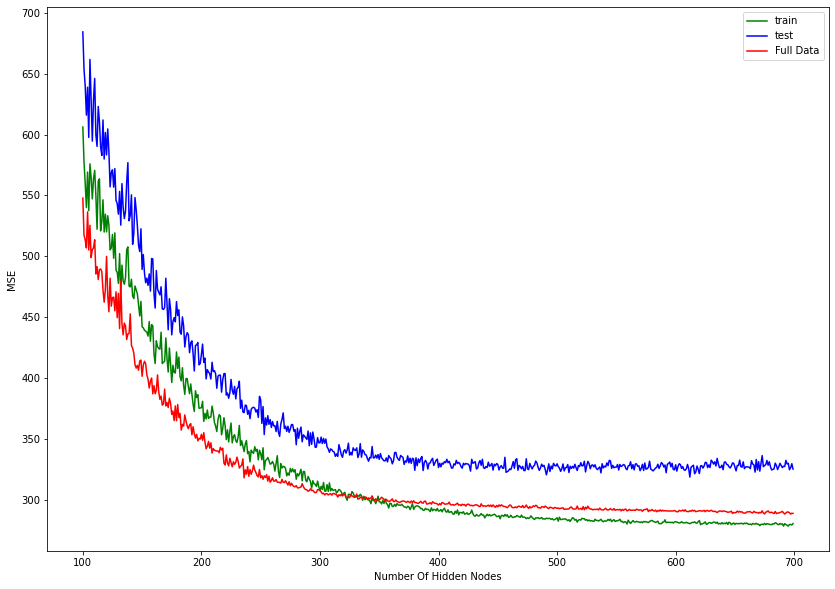

In [76]:

test_train_hidden_nodes = test_train_model_results["NumberOfHiddenNodes"]
train_mse = test_train_model_results["TrainMSE"]
test_mse = test_train_model_results["TestMSE"]

plt.figure(figsize=(14,10))
plt.plot(test_train_hidden_nodes, train_mse, color='g', label="train")
plt.plot(test_train_hidden_nodes, test_mse, color='b', label="test")
plt.plot(hidden_nodes, mse, color='red', label="Full Data")
plt.legend()
plt.xlabel("Number Of Hidden Nodes")
plt.ylabel("MSE")

Text(0.5, 1.0, 'Accuracy Score Vs Number Of Hidden Nodes')

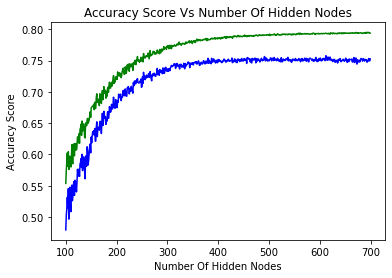

In [77]:
train_score =test_train_model_results["TrainScore"]
test_score = test_train_model_results["TestScore"]

plt.plot(test_train_hidden_nodes, train_score, color='g',label='Training Accuracy')
plt.plot(test_train_hidden_nodes, test_score, color='b',label='Testing Accuracy')
plt.xlabel('Number Of Hidden Nodes')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Vs Number Of Hidden Nodes')

In [79]:
mlp = MLPRegressor(hidden_layer_sizes=(400,))

mlp.fit(X,y)

y_pred = mlp.predict(X)


r2 = r2_score(y, y_pred)

print("Coefficient of Determination R^2: %.2f" %  r2)
print("MSE ", round(mean_squared_error(y, y_pred), 4))
print("MAE ", round(mean_absolute_error(y, y_pred), 4))
print("Accuracy ", round(model.score(X, y), 4))

Coefficient of Determination R^2: 0.78
MSE  296.9333
MAE  13.8801
Accuracy  0.7864


I achieved better MSE when the nomber of nodes was greater than 40